# **Housing Price Prediction**

## Importing Libraries and loading data

In [85]:
import pandas as pd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

df = pd.read_csv('/content/housing_price_dataset.csv')
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


## Split data into X and y

In [86]:
from sklearn.model_selection import train_test_split

# Define a mapping for the categories
neighborhood_mapping = {'Rural': 0, 'Suburb': 1, 'Urban': 2}

# Apply the mapping to the "Neighborhood" column
#df['Neighborhood'] = df['Neighborhood'].replace(neighborhood_mapping, 3)

num_rows = len(df.index)

y = df['Price']
df = df.drop('Neighborhood', axis=1)
X = df.drop('Price', axis=1)

In [87]:
X = X.to_numpy()
y = y.to_numpy()

X.shape, y.shape

((50000, 4), (50000,))

In [90]:
y = y.reshape(50000, 1)
X = X.reshape(50000, 4)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=100)

In [92]:
X_train.shape, y_train.shape

((45000, 4), (45000, 1))

# Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Applying the model to make a prediction

In [94]:
y_LR_train_pred = lr.predict(X_train)
y_LR_test_pred = lr.predict(X_test)

print('Prediction Complete')

Prediction Complete


## Evaluate model performance

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_LR_train_pred)
lr_train_r2 = r2_score(y_train, y_LR_train_pred)

lr_test_mse = mean_squared_error(y_test, y_LR_test_pred)
lr_test_r2 = r2_score(y_test, y_LR_test_pred)

In [96]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)


LR MSE (Train):  2497643248.538757
LR R2 (Train):  0.5685236402460658
LR MSE (Test):  2446392784.855746
LR R2 (Test):  0.5837170763867221


In [97]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,2497643248.538757,0.568524,2446392784.855746,0.583717


# **Data visualization of (LR) prediction result**

Text(0.5, 0, 'Price')

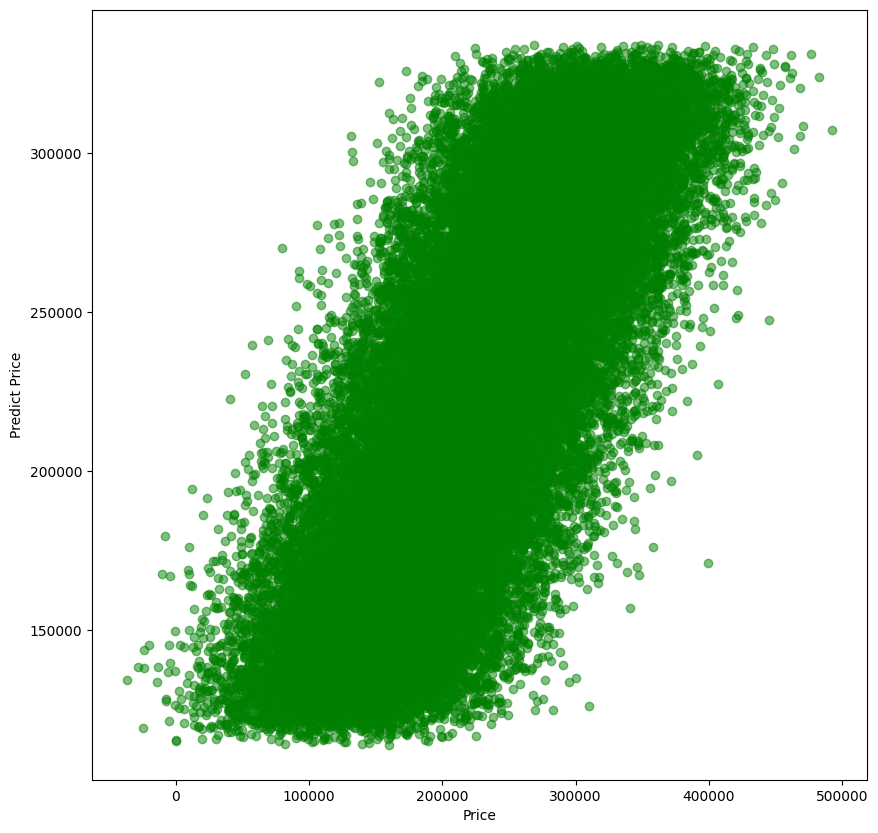

In [103]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
plt.scatter(x=y_train, y=y_LR_train_pred, c='green', alpha=0.5)

plt.ylabel('Predict Price')
plt.xlabel('Price')